# Italian Wine Classification Problem using Artificial Neural Net (Keras)

In [53]:
# Load Libraries

import numpy
import pandas
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from keras.layers import Dropout
from keras.constraints import maxnorm
from tensorflow.keras.optimizers import SGD

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline


from numpy import interp
from itertools import cycle
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix, classification_report

In [9]:
# fix random seed for reproducibility (initialization of weights is random)
seed = 7
numpy.random.seed(seed)

# Load Data
dataset = numpy.loadtxt("wine.data", delimiter = ",")
dataset.shape

(178, 14)

**The wine dataset is obtained from UCI Machine Learning Repository (https://archive.ics.uci.edu/ml/datasets/Wine), which comprised of 178 instances with 13 attributes. The first column "Alcohol" is the target column with Class values 0 ,1 and 2. There are no missing values in the dataset. Let's split the data into dependent variables (X) and target variable (y)**

<div class="alert alert-block alert-info">
    
<b>The names of the columns are:</b>   

1. Alcohol
2. Malic acid
3. Ash
4. Alcalinity of ash  
5. Magnesium
6. Total phenols
7. Flavanoids
8. Nonflavanoid phenols
9. Proanthocyanins
10. Color intensity
11. Hue
12. OD280/OD315 of diluted wines
13. roline

    
</div>

In [10]:
# split into input (X) and output (Y) variables
X = dataset[:,1:].astype('float32')
y = dataset[:,0]

# encode class values as integers
encoder = LabelEncoder()
encoder.fit(y)
y = encoder.transform(y)

# convert integers to dummy variables (i.e. one hot encoded)
dummy_y = np_utils.to_categorical(y)

# one hot encode output variable
#y_oneHot = to_categorical(y)

In [4]:
# class values breakdown
unique, counts = numpy.unique(y, return_counts=True)
dict(zip(unique, counts))

{0: 59, 1: 71, 2: 48}

**There are 59, 71, and 48 instances for class values 0, 1, and 2 respectively. We can assume the datasset reasonably balanced**

In [5]:
# first row of X
print("Size of X : ", X.shape)
X[0,:]

Size of X :  (178, 13)


array([1.423e+01, 1.710e+00, 2.430e+00, 1.560e+01, 1.270e+02, 2.800e+00,
       3.060e+00, 2.800e-01, 2.290e+00, 5.640e+00, 1.040e+00, 3.920e+00,
       1.065e+03], dtype=float32)

**X values are all positive continuous real numbers. The scale of the last predictor seems to be higher in comparision to other variables**

In [14]:
# size of dummy_y
dummy_y.shape

(178, 3)

## 1) Defining Baseline Neural Network (Mulltilayer Perceptrons) Model 

### 1a) Using Automatic Verification Dataset

In [7]:
numpy.random.seed(seed)

# create model
model = Sequential()
model.add(Dense(7, input_dim=13, kernel_initializer= 'uniform' , activation= 'relu' ))
model.add(Dense(3, kernel_initializer= 'uniform', activation= 'sigmoid' ))

# Compile model
model.compile(loss= 'categorical_crossentropy' , optimizer= 'adam' , metrics=[ 'accuracy' ])

# Fit the model
model.fit(X, dummy_y, validation_split=0.2, epochs=200, batch_size=10)

# evaluate the model
scores = model.evaluate(X, dummy_y)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

Epoch 1/200
15/15 [==============================] - 0s 9ms/step - loss: 0.8369 - accuracy: 0.5634 - val_loss: 2.1897 - val_accuracy: 0.0000e+00
Epoch 2/200
15/15 [==============================] - 0s 2ms/step - loss: 0.7524 - accuracy: 0.7324 - val_loss: 2.3165 - val_accuracy: 0.0000e+00
Epoch 3/200
15/15 [==============================] - 0s 3ms/step - loss: 0.7278 - accuracy: 0.7817 - val_loss: 2.4287 - val_accuracy: 0.0000e+00
Epoch 4/200
15/15 [==============================] - 0s 3ms/step - loss: 0.6609 - accuracy: 0.8239 - val_loss: 2.2642 - val_accuracy: 0.0000e+00
Epoch 5/200
15/15 [==============================] - 0s 3ms/step - loss: 0.6120 - accuracy: 0.7817 - val_loss: 2.3145 - val_accuracy: 0.0000e+00
Epoch 6/200
15/15 [==============================] - 0s 3ms/step - loss: 0.5729 - accuracy: 0.8169 - val_loss: 2.2644 - val_accuracy: 0.0000e+00
Epoch 7/200
15/15 [==============================] - 0s 3ms/step - loss: 0.5510 - accuracy: 0.8169 - val_loss: 1.9593 - val_accura

15/15 [==============================] - 0s 2ms/step - loss: 0.3619 - accuracy: 0.8521 - val_loss: 1.4922 - val_accuracy: 0.0000e+00
Epoch 58/200
15/15 [==============================] - 0s 3ms/step - loss: 0.4028 - accuracy: 0.8310 - val_loss: 1.8035 - val_accuracy: 0.0000e+00
Epoch 59/200
15/15 [==============================] - 0s 2ms/step - loss: 0.3598 - accuracy: 0.8521 - val_loss: 1.3565 - val_accuracy: 0.1111
Epoch 60/200
15/15 [==============================] - 0s 2ms/step - loss: 0.3556 - accuracy: 0.8380 - val_loss: 1.5475 - val_accuracy: 0.0000e+00
Epoch 61/200
15/15 [==============================] - 0s 3ms/step - loss: 0.3562 - accuracy: 0.8592 - val_loss: 1.4861 - val_accuracy: 0.0000e+00
Epoch 62/200
15/15 [==============================] - 0s 2ms/step - loss: 0.3505 - accuracy: 0.8521 - val_loss: 1.4214 - val_accuracy: 0.0000e+00
Epoch 63/200
15/15 [==============================] - 0s 3ms/step - loss: 0.3471 - accuracy: 0.8521 - val_loss: 1.4246 - val_accuracy: 0.0556

15/15 [==============================] - 0s 3ms/step - loss: 0.2197 - accuracy: 0.9225 - val_loss: 0.2683 - val_accuracy: 0.9722
Epoch 115/200
15/15 [==============================] - 0s 3ms/step - loss: 0.2201 - accuracy: 0.9296 - val_loss: 0.4735 - val_accuracy: 0.8611
Epoch 116/200
15/15 [==============================] - 0s 2ms/step - loss: 0.2182 - accuracy: 0.9225 - val_loss: 0.2740 - val_accuracy: 0.9444
Epoch 117/200
15/15 [==============================] - 0s 2ms/step - loss: 0.2315 - accuracy: 0.9296 - val_loss: 0.2423 - val_accuracy: 0.9722
Epoch 118/200
15/15 [==============================] - 0s 2ms/step - loss: 0.2382 - accuracy: 0.9085 - val_loss: 0.3809 - val_accuracy: 0.9167
Epoch 119/200
15/15 [==============================] - 0s 2ms/step - loss: 0.2189 - accuracy: 0.9366 - val_loss: 0.4060 - val_accuracy: 0.8889
Epoch 120/200
15/15 [==============================] - 0s 3ms/step - loss: 0.2075 - accuracy: 0.9366 - val_loss: 0.2729 - val_accuracy: 0.9444
Epoch 121/200

15/15 [==============================] - 0s 2ms/step - loss: 0.1811 - accuracy: 0.9155 - val_loss: 0.0806 - val_accuracy: 0.9722
Epoch 172/200
15/15 [==============================] - 0s 2ms/step - loss: 0.1565 - accuracy: 0.9648 - val_loss: 0.1583 - val_accuracy: 0.9722
Epoch 173/200
15/15 [==============================] - 0s 2ms/step - loss: 0.1581 - accuracy: 0.9577 - val_loss: 0.1240 - val_accuracy: 0.9722
Epoch 174/200
15/15 [==============================] - 0s 2ms/step - loss: 0.1473 - accuracy: 0.9648 - val_loss: 0.1430 - val_accuracy: 0.9722
Epoch 175/200
15/15 [==============================] - 0s 2ms/step - loss: 0.1841 - accuracy: 0.9155 - val_loss: 0.0510 - val_accuracy: 0.9722
Epoch 176/200
15/15 [==============================] - 0s 3ms/step - loss: 0.1528 - accuracy: 0.9507 - val_loss: 0.2668 - val_accuracy: 0.9444
Epoch 177/200
15/15 [==============================] - 0s 2ms/step - loss: 0.2011 - accuracy: 0.9085 - val_loss: 0.0864 - val_accuracy: 0.9722
Epoch 178/200

**With 20% verification set, we can see the accuracy of 92.7%. And just to make sure it is not a result of any statistical fluke, we will run the cross-validaton model.**

<div class="alert alert-block alert-info">

### Note : Working of NN in Keras

**Dense class defines fully connected layers** 
- **Dense**(*No. of neurons on first hidden layer*, input_dim = No. of input features, kernel_initializer = generates weight/filter matrix, activation = type of activation funtion used)


- **Dense**(*No. of neurons on next hidden layer OR output layer*, kernel_initializer, activation)


- **Kernel_Intializer** creates a random matrix of weights (size = **dim. of 2nd layer BY (dim. of 1st layer + 1)**). Each column of the weight matrix makes dot product with the 1st layer. Then the activation funtion is applied on the dot product, which spits out a "number" each for each neuron in the second layer. This 2nd layer (hidden layer) is often called as a activation layer.


- Now, thus obtained activation layer becomes first layer next time and the above process is repeated on this activation layer which result in another activation layer. This keeps on repeating (depending on the depth of the NN), and when this process ends the last "**activation layer**" is the output layer.


- The dim. of the last layer depends on type of problem. For example, for binary classifcation and regression problem it is just 1. For multiclass classicication, it is the number of classes, for eg it is 3 in our case. All these process is often called as **Forward Propagation**.


- The numbers spit out on output layer (i.e predicted values) might be different from actual values in training data (y true). A costfunction (i.e error) is calculated (we used **logarithmic loss** - same kind of loss in logrithmic regression) which is called as "**Categorical_Crossentropy**" by the Keras.


- The error is then back propagated through the network, one layer at a time, and the weights matrix are updated according to the amount they contributed to the error. This is often called as "**Back Propagation**". One round of updating the network for the entire training dataset is called an epoch. 


- The overall objective is to minimize the cost-function, and different Gradient Descent Algorithms are used, for example we used '**adam**' for it is and efficient default algo.


- Finally, we used "**accuracy**" as a metric in our case assuming balanced classification, and again the type of metric can be different in other cases.


Also NOTE that each "ingoing" (1st layer what we called) layer gets its own weight/filter matrix.
    
</div>    

### 1b) Using Manual k-Fold Cross Validation

In [15]:
numpy.random.seed(seed)

def baseline_model():
    # create model
    model = Sequential()
    model.add(Dense(7, input_dim=13, kernel_initializer= 'uniform' , activation= 'relu' ))
    model.add(Dense(3, kernel_initializer= 'uniform', activation= 'sigmoid' ))
    # Compile model
    model.compile(loss= 'categorical_crossentropy' , optimizer= 'adam' , metrics=[ 'accuracy' ])
    return model

estimator = KerasClassifier(build_fn=baseline_model, epochs=200, batch_size=5, verbose=0)
kfold = KFold(n_splits=10, shuffle=True, random_state=seed)

results = cross_val_score(estimator, X, dummy_y, cv=kfold)
print("Accuracy: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

C:\Users\ukesh\AppData\Local\Temp/ipykernel_14956/979038044.py:10: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead.
  estimator = KerasClassifier(build_fn=baseline_model, epochs=200, batch_size=5, verbose=0)


Accuracy: 92.68% (7.90%)


**We can see the accuracy is 92.68 % with just one-hidden layer with 7 neurons. This kind of supports the accuracy result we got in (1a)**

**Let's update the model with two-hidden layers, with 13 and 7 neurons respectively.**

In [56]:
numpy.random.seed(seed)

def baseline_model():
    # create model
    model = Sequential()
    model.add(Dense(13, input_dim=13, kernel_initializer= 'uniform' , activation= 'relu' ))
    model.add(Dense(7, kernel_initializer= 'uniform' , activation= 'relu' ))
    model.add(Dense(3, kernel_initializer= 'uniform', activation= 'sigmoid' ))
    # Compile model
    model.compile(loss= 'categorical_crossentropy' , optimizer= 'adam' , metrics=[ 'accuracy' ])
    return model

estimator = KerasClassifier(build_fn=baseline_model, epochs=200, batch_size=5, verbose=0)
kfold = KFold(n_splits=10, shuffle=True, random_state=seed)

results = cross_val_score(estimator, X, dummy_y, cv=kfold)
print("Accuracy: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

C:\Users\ukesh\AppData\Local\Temp/ipykernel_13208/692654836.py:11: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead.
  estimator = KerasClassifier(build_fn=baseline_model, epochs=200, batch_size=5, verbose=0)


Accuracy: 93.76% (5.98%)


**It improvedd the accuracy by about 1% which is good. Also note that we have used two hidden-layers here.**

**Let's standardize the input features, and rerun the above model. Standardization is often benficial in NN. We will use pipeline to achieve this.**

## 2) Apply Data Preparation (Stardardization) and Build a Model

In [17]:
numpy.random.seed(seed)

def standardized_model():
    # create model
    model = Sequential()
    model.add(Dense(13, input_dim=13, kernel_initializer= 'uniform' , activation= 'relu' ))
    model.add(Dense(7, kernel_initializer= 'uniform' , activation= 'relu' ))
    model.add(Dense(3, kernel_initializer= 'uniform', activation= 'sigmoid' ))
    # Compile model
    model.compile(loss= 'categorical_crossentropy' , optimizer= 'adam' , metrics=[ 'accuracy' ])
    return model

# evaluate baseline model with standardized dataset
numpy.random.seed(seed)
estimators = []
estimators.append(( 'standardize' , StandardScaler()))
estimators.append(( 'mlp' , KerasClassifier(build_fn=standardized_model, epochs=200, batch_size=5, verbose=0)))
pipeline = Pipeline(estimators)

kfold = KFold(n_splits=10, shuffle=True, random_state=seed)
results = cross_val_score(pipeline, X, dummy_y, cv=kfold)
print("Standardized: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

C:\Users\ukesh\AppData\Local\Temp/ipykernel_14956/328066603.py:15: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead.
  estimators.append(( 'mlp' , KerasClassifier(build_fn=standardized_model, epochs=200, batch_size=5, verbose=0)))


Standardized: 97.12% (4.62%)


**With the standarization, the accuracy is improved to 97.12 %. Note that we might be able to improve this number by choosing deeper network with more neurons, this might not be always helpful though.**

**Also, there's a chance of improving the model by tunning some hyperparameters using GridSearchCV. Let's perform GridSearch**

## 3) Grid Search Deep Learning Model Parameters

In [12]:
# Function to create model, required for KerasClassifier
def create_model(optimizer= 'rmsprop' , init= 'glorot_uniform' ):
    # create model
    model = Sequential()
    model.add(Dense(13, input_dim=13, kernel_initializer=init, activation= 'relu' ))
    model.add(Dense(7, kernel_initializer=init, activation= 'relu' ))
    model.add(Dense(3, kernel_initializer=init, activation= 'sigmoid' ))
    # Compile model
    model.compile(loss= 'categorical_crossentropy' , optimizer=optimizer, metrics=[ 'accuracy' ])
    return model

# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)

# create model
model = KerasClassifier(build_fn=create_model, verbose=0)
# grid search epochs, batch size and optimizer
optimizers = [ 'rmsprop' , 'adam' ]
init = [ 'glorot_uniform' , 'normal' , 'uniform' ]
epochs = numpy.array([50, 100, 200])
batches = numpy.array([5, 10, 20])
param_grid = dict(optimizer=optimizers, epochs=epochs, batch_size=batches, init=init)
grid = GridSearchCV(estimator=model, param_grid=param_grid)
grid_result = grid.fit(X, dummy_y)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

C:\Users\ukesh\AppData\Local\Temp/ipykernel_11564/1076632290.py:24: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead.
  model = KerasClassifier(build_fn=create_model, verbose=0)


Best: 0.933016 using {'batch_size': 5, 'epochs': 200, 'init': 'uniform', 'optimizer': 'rmsprop'}
0.464603 (0.392504) with: {'batch_size': 5, 'epochs': 50, 'init': 'glorot_uniform', 'optimizer': 'rmsprop'}
0.410317 (0.348318) with: {'batch_size': 5, 'epochs': 50, 'init': 'glorot_uniform', 'optimizer': 'adam'}
0.520159 (0.306763) with: {'batch_size': 5, 'epochs': 50, 'init': 'normal', 'optimizer': 'rmsprop'}
0.577460 (0.397774) with: {'batch_size': 5, 'epochs': 50, 'init': 'normal', 'optimizer': 'adam'}
0.464603 (0.388552) with: {'batch_size': 5, 'epochs': 50, 'init': 'uniform', 'optimizer': 'rmsprop'}
0.453492 (0.342108) with: {'batch_size': 5, 'epochs': 50, 'init': 'uniform', 'optimizer': 'adam'}
0.444921 (0.358705) with: {'batch_size': 5, 'epochs': 100, 'init': 'glorot_uniform', 'optimizer': 'rmsprop'}
0.437143 (0.361559) with: {'batch_size': 5, 'epochs': 100, 'init': 'glorot_uniform', 'optimizer': 'adam'}
0.527143 (0.408445) with: {'batch_size': 5, 'epochs': 100, 'init': 'normal', 'o

**The best we got here is 93.3%, extending the hyperparameter tunning to other parameters might help improve the result. For example we can check different types of activation function.**

**There might be overfitting and underfitting problems in our models. We can see this by visualizing the Model Training History**

## 4) Visualize Model Training History

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


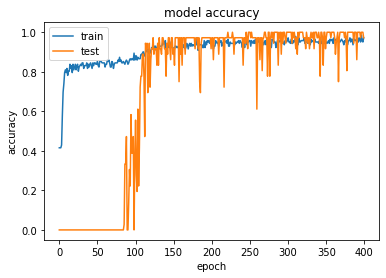

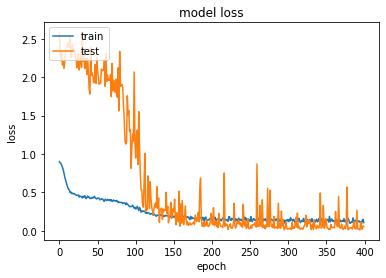

In [19]:
# Visualize training history

# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)

# prepare the model
#scaler = StandardScaler().fit(X)
#rescaledX = scaler.transform(X)

# create model
model = Sequential()
model.add(Dense(13, input_dim=13, kernel_initializer= 'uniform' , activation= 'relu' ))
model.add(Dense(8, kernel_initializer= 'uniform' , activation= 'relu' ))
model.add(Dense(3, kernel_initializer= 'uniform' , activation= 'sigmoid' ))

# Compile model
model.compile(loss= 'categorical_crossentropy' , optimizer= 'rmsprop' , metrics=[ 'accuracy' ])
# Fit the model
history = model.fit(X, dummy_y, validation_split=0.2, epochs=400, batch_size=5, verbose=0)

# list all data in history
print(history.history.keys())

# summarize history for accuracy
plt.plot(history.history[ 'accuracy' ])
plt.plot(history.history[ 'val_accuracy' ])
plt.title( 'model accuracy' )
plt.ylabel( 'accuracy' )
plt.xlabel( 'epoch' )
plt.legend([ 'train' , 'test' ], loc= 'upper left' )
plt.show()

# summarize history for loss
plt.plot(history.history[ 'loss' ])
plt.plot(history.history[ 'val_loss' ])
plt.title( 'model loss' )
plt.ylabel( 'loss' )
plt.xlabel( 'epoch' )
plt.legend([ 'train' , 'test'], loc= 'upper left' )
plt.show()


**With 20% validation dataset, there's no overfitting. With 30% or more validation data, overfitting can be observed. One of a simple approach to deal with overfitting is to increase the number of training dataset (which we did) as mentioned below**

<div class="alert alert-block alert-info">
    
**Dealing with Overfitting**: 
- **Sometime Increasing the number of training datasets can help overcome overfitting.** 
- **Data augmentation like rotating/flipping/zooming in out the image can help**
- **Dropout, L1, L2 regularization can be helpful as well**
- **A simple model structure with fewer layers and neurons also can reduce overfitting problem**
    
</div>

## 5) Using dropout regularization (to reduce overfitting)

### 5a) Using dropout just on the visible layer

In [43]:
def dropoutV_model():
    # create model
    model = Sequential()
    model.add(Dropout(0.2, input_shape = (13,)))
    model.add(Dense(13, kernel_initializer= 'normal' , activation= 'relu', kernel_constraint=maxnorm(3)))
    model.add(Dense(7, kernel_initializer= 'normal' , activation= 'relu', kernel_constraint=maxnorm(3)))
    model.add(Dense(3, kernel_initializer= 'uniform', activation= 'sigmoid' ))
    # Compile model
    model.compile(loss= 'categorical_crossentropy' , optimizer= 'adam' , metrics=[ 'accuracy' ])
    return model


numpy.random.seed(seed)
estimators = []
estimators.append(( 'standardize' , StandardScaler()))
estimators.append(( 'mlp' , KerasClassifier(build_fn=dropoutV_model, epochs=300, batch_size=16, verbose=0)))
pipeline = Pipeline(estimators)
kfold = KFold(n_splits=10, shuffle=True, random_state=seed)
results = cross_val_score(pipeline, X, dummy_y, cv=kfold)

print("Visible: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))




C:\Users\ukesh\AppData\Local\Temp/ipykernel_11564/766110018.py:16: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead.
  estimators.append(( 'mlp' , KerasClassifier(build_fn=baseline_model, epochs=300, batch_size=16, verbose=0)))


Visible: 98.27% (2.65%)


**Here, we applied a Dropout layer between the input and the first hidden layer. The dropout rate is chosen to 20%, ie one-in-five inputs will be randomly excluded from each update cycle. Additionally, we imposed a constraint on weights of each hidden layer such that the maximum norm of the weights does not exceed a value of 3 using kernel_constraint argument.**

**With this we can see the upliftment in the performance of the model to 98.27%**

**Also, let's see the effect of the applicaton of Dropout layers on the Hidden Layers**

### 5b) Using Dropout on Hidden layers

In [44]:
def dropoutH_model():
    # create model
    model = Sequential()
    model.add(Dense(13, input_dim = 13, kernel_initializer= 'normal' , activation= 'relu', kernel_constraint=maxnorm(3)))
    model.add(Dropout(0.2))
    model.add(Dense(7, kernel_initializer= 'normal' , activation= 'relu', kernel_constraint=maxnorm(3)))
    model.add(Dropout(0.2))
    model.add(Dense(3, kernel_initializer= 'uniform', activation= 'sigmoid' ))
    # Compile model
    #sgd = SGD(learning_rate=0.1, momentum=0.9, decay=0.0, nesterov=False)
    model.compile(loss= 'categorical_crossentropy' , optimizer= 'adam' , metrics=[ 'accuracy' ])
    return model


numpy.random.seed(seed)
estimators = []
estimators.append(( 'standardize' , StandardScaler()))
estimators.append(( 'mlp' , KerasClassifier(build_fn=dropoutH_model, epochs=300, batch_size=16, verbose=0)))
pipeline = Pipeline(estimators)
kfold = KFold(n_splits=10, shuffle=True, random_state=seed)
results = cross_val_score(pipeline, X, dummy_y, cv=kfold)

print("Visible: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))



C:\Users\ukesh\AppData\Local\Temp/ipykernel_11564/3286795883.py:18: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead.
  estimators.append(( 'mlp' , KerasClassifier(build_fn=baseline_model, epochs=300, batch_size=16, verbose=0)))


Visible: 97.12% (4.62%)


**With the application of Dropout layers on the Hidden Layers, the accuracy is now 97.12%. Apparently, Dropout layers applied on the visible or input layers gives a better result.**

**There's still many stuffs we can experiment with, like expermenting with network size, learning rate, decay rate etc. But since our result are getting better with the Dropouts, let's finalize our model**

## 6) Finalized Model

In [44]:
# split into 90% for train and 10% for test
X_train, X_test, y_train, y_test = train_test_split(X, dummy_y, test_size=0.1, random_state=seed)

# Standardizing test train Xs
scaler = StandardScaler().fit(X_train)
rescaledX_train = scaler.transform(X_train)
rescaledX_test = scaler.transform(X_test)

def baseline_model():
    # create model
    model = Sequential()
    model.add(Dropout(0.2, input_shape = (13,)))
    model.add(Dense(13, kernel_initializer= 'normal' , activation= 'relu', kernel_constraint=maxnorm(3)))
    model.add(Dense(7, kernel_initializer= 'normal' , activation= 'relu', kernel_constraint=maxnorm(3)))
    model.add(Dense(3, kernel_initializer= 'uniform', activation= 'sigmoid' ))
    # Compile model
    model.compile(loss= 'categorical_crossentropy' , optimizer= 'adam' , metrics=[ 'accuracy' ])
    return model

numpy.random.seed(seed)

# Fit the model
model = baseline_model()
model.fit(rescaledX_train, y_train, validation_data=(rescaledX_test,y_test), epochs=300, batch_size=10, verbose=0)

# evaluate the model
scores = model.evaluate(rescaledX_test, y_test)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

# Predict
yhat = model.predict(rescaledX_test)
print(yhat)

1/1 [==============================] - 0s 29ms/step - loss: 0.0022 - accuracy: 1.0000
accuracy: 100.00%
[[4.49898689e-05 1.20431751e-01 9.97819543e-01]
 [9.91877079e-01 1.14453405e-01 5.99566102e-03]
 [9.11097450e-05 1.13079488e-01 9.97198582e-01]
 [8.34458933e-06 8.74220431e-02 9.99251366e-01]
 [2.16665566e-02 9.93224859e-01 1.60890520e-02]
 [7.74890184e-04 1.58090621e-01 9.89820957e-01]
 [3.02744508e-02 9.89122748e-01 2.39323974e-02]
 [9.95582104e-01 1.25795692e-01 1.65176392e-03]
 [3.55369747e-02 9.95523274e-01 2.81870365e-03]
 [8.12351704e-04 4.31130230e-01 9.58960831e-01]
 [9.99292374e-01 5.32366931e-02 3.13758850e-04]
 [7.15221322e-05 9.99998987e-01 4.48488208e-06]
 [6.61700964e-04 1.27001822e-01 9.92133856e-01]
 [9.84373689e-03 9.98926520e-01 1.83087587e-03]
 [3.43317986e-02 9.97435570e-01 9.32246447e-04]
 [7.20754266e-03 9.98324275e-01 5.54794073e-03]
 [3.65656316e-02 9.98041272e-01 4.18335199e-04]
 [6.33031130e-04 1.47153705e-01 9.91344333e-01]]


**We can see 100% accuracy here, and the predicted values (probabilites values) are also printed. Rounding the yhat values might make more sense (or choosing a threshold values like 0.5).**

In [45]:
# rounding the predicted values (yhat)
yhat_round = yhat.round()
print ('yhat rounded:', '\n\n', yhat_round, '\n\n')
print ('y test:', '\n\n', y_test)

y predicted: 

 [[0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]] 


y test: 

 [[0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


### 6a) Classification Report, Confusion Matrix

Classification Report 

               precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         8
           2       1.00      1.00      1.00         7

    accuracy                           1.00        18
   macro avg       1.00      1.00      1.00        18
weighted avg       1.00      1.00      1.00        18
 




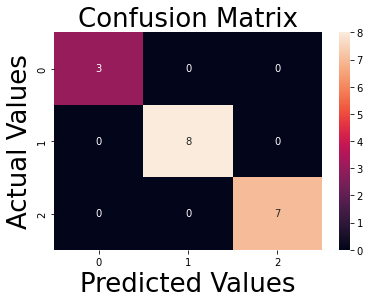

In [49]:
# Preparing predicted and test values for Classification Report and Confusion Matrix
y_pred=numpy.argmax(yhat, axis=1)
y_test1=numpy.argmax(y_test, axis=1)

# Classification Report
model_report = classification_report(y_test1, y_pred)
print('Classification Report','\n\n' ,model_report, '\n\n')


# Confusion Matrix
cm = confusion_matrix(y_test1, y_pred)
# Creating a dataframe for a array-formatted Confusion matrix,so it will be easy for plotting.
cm_df = pandas.DataFrame(cm, index = ['0','1','2'], columns = ['0','1','2'])
# plotting confusion matrix
ax= pyplot.subplot()
sns.heatmap(cm_df, annot=True);
plt.title('Confusion Matrix', fontsize=26);
plt.ylabel('Actual Values', fontsize=26);
plt.xlabel('Predicted Values', fontsize=26)
plt.show()


**We can see perfect scores for Precision, Recall, and F1-Scores** 

### 6b) ROC Score and Curve

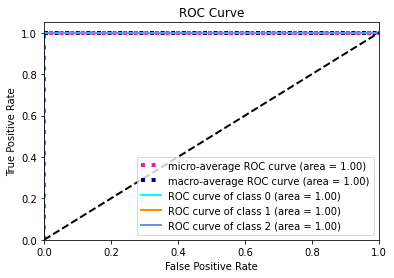

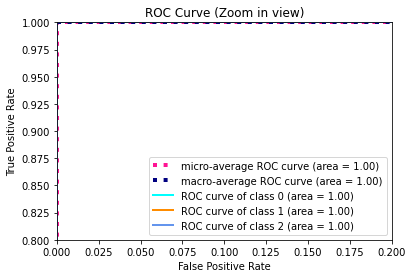

In [54]:
# number of class labels
n_classes = 3

# Plot linewidth.
lw = 2

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], yhat[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), yhat.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Compute macro-average ROC curve and ROC area

# First aggregate all false positive rates
all_fpr = numpy.unique(numpy.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = numpy.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure(1)
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()


# Zoom in view of the upper left corner.
plt.figure(2)
plt.xlim(0, 0.2)
plt.ylim(0.8, 1)
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Zoom in view)')
plt.legend(loc="lower right")
plt.show()

**We can see that the ROC Scores for all 3 classes are a perfect 1**

## 7) Conclusions

   **Nevertheless we got a perfect result for this problem, it would be interesting to explore other aspects of Artificial Neural Network (Multilayer Perceptrons) like considering and playing around with the hyperparameters tunning more in detail, but this can be computationally expensive**